<a href="https://colab.research.google.com/github/jordantab/BA476/blob/main/Lab4_Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BA 476 Lab 4: Decision trees

This week we  will practice training decision trees in Python using the Cogo labs dataset that you should be familiar with by now. Recall that we are trying ot predict customers' email open rates to identify who to target with an ad campaign.

## Setup

Lets start by importing the necessary libraries and mounting the Google Drive:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the data

The dataset we will use is the same that we used for the labs on descriptive analytics; refer to the earlier
descriptions for details. Let’s load the training data. Change the path below to accurately reflect the location
of the data on your Drive.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/ColabNotebooks/BA476/cogo-all.tsv', sep='\t')

## Train and Test Sets

We start by splitting the data into a training and testing set. We've done this manually before, but today we'll use Scikit-learn's `train_test_split` function.

In [ ]:
X = df.loc[:, df.columns != "p_open"]
y = df["p_open"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((230638, 16), (57660, 16), (230638,), (57660,))

## Data Preparation

Instead of training the model on every predictor of the data, we can train it using a subset of the predictors. Refer back to previous labs if you can't remember how to handle categorical variables or apply transformations to variables.

In [ ]:
# it's up to you to add more predictors as you see fit
predictors = ["browser1", "browser2", "browser3"]

## Decision trees

Let's start with a straightforward decision tree using the [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). We've already made the necessary imports above, so we can instantiate and train the model.

In [ ]:
dt = DecisionTreeRegressor(max_depth = 3).fit(X_train[predictors], y_train)
# fit the model here


One of the great things about decision trees is that they are interpretable, so we can plot what the tree looks like. You should try adjusting the complexity parameters of the tree (including `max_depth`, `min_samples_split` and `min_samples_leaf`) to see how it changes.

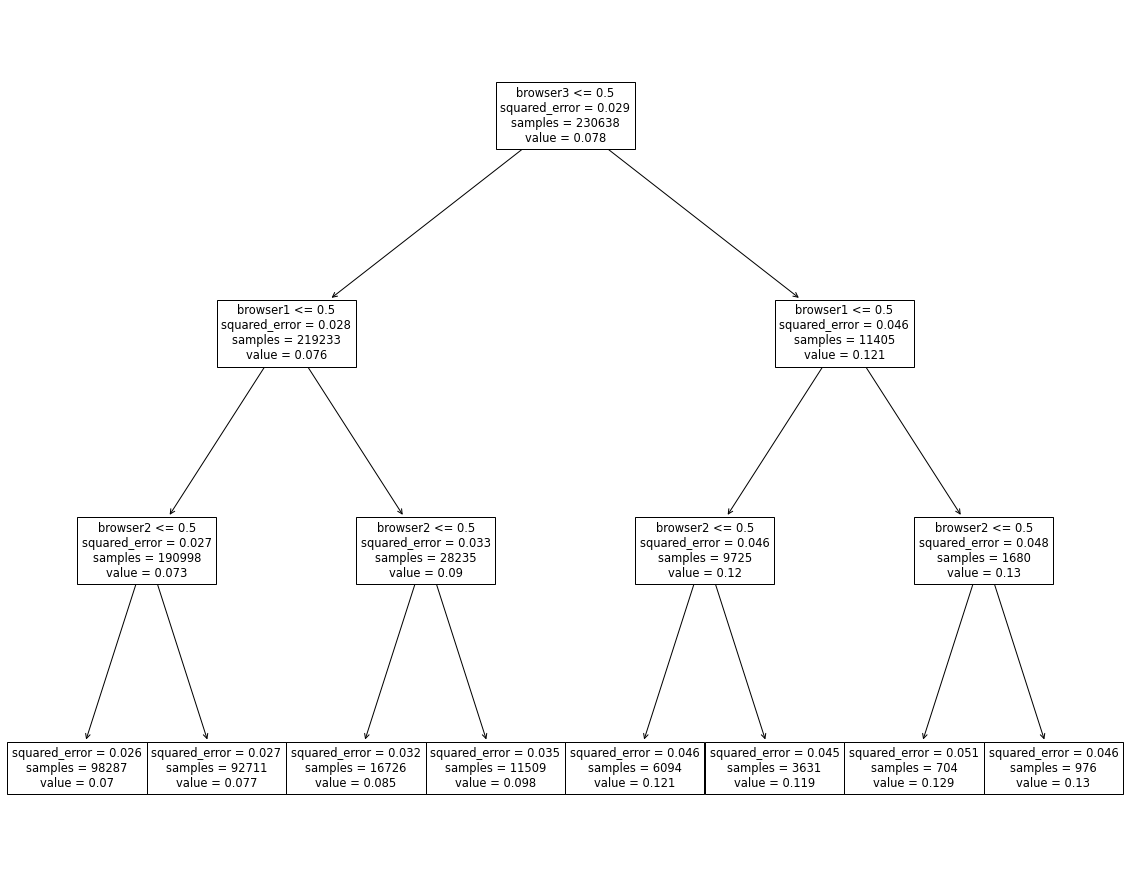

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(20,16))
tree.plot_tree(dt, feature_names=predictors);

Now we can make predictions on the training set and evaluate MSE. We've been computing MSE manually up to now, but it's time to automate that by using [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Spend some time browsing [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to see what other metrics are available.

In [ ]:
from sklearn.metrics import mean_squared_error

# predict and evaluate on training set here

We can do the same for the test set:

In [ ]:
# predict and evaluate for testing set

During construction of the decision tree we try splitting on each of the predictors several times. By keeping track of the average improvement in loss (MSE, here) for each predictor we can get a sense of how important each feature is. The (normalized) importance scores can be accessed in the `feature_importances_` attribute of the estimator. Notice anything (un)surprising?

## Investigate cost complexity pruning

You can find more information about how cost-complexity pruning is implemented in sklearn [here](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning). Notably, the size of the tree $|T|$ is defined as the number of terminal/leaf nodes, in other word the number of regions in predictor-space. In terms of parameters, `ccp_alpha` behaves exactly like the regularization parameter we discussed in class.

Try the suggested values for $\alpha$ to see how it affects the size of the tree.

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
alphas = [0.0001, 0.00005,  0.00001,  0.000001, 0.00000001, 0]

# try different alphas and see
# see lecture recording for code

## Classification with a decision tree

Investigate using [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
A quick way to do this is to pretend to predict one of the categorical predictors in your data. Alternatively you can use any of the datasets we've used before this semester (iris, cars, etc.).

Notable parameters to set include the stopping criteria (`max_depth`, `ccp_alpha`, etc.) and `criterion` to use to choose the best split (gini/entropy).


In [ ]:
# your code here